In [ ]:
# Import the code for the classifier in this file and run everything here
# as a testing/results interface

In [1]:
# Insert top level directory into the system path so parent and sibling 
# modules can be imported 
import pathlib
import sys
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
import numpy as np
from pprint import pprint
from sklearn import preprocessing as p
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convert path to use proper directory markers based on 
# operating system
PATH = str(pathlib.Path('../../'))

# Insert path to system path
sys.path.insert(0, PATH)

In [2]:
# THIS IS HERE JUST AS AN EXAMPLE. YOU CAN REMOVE THIS WHEN YOU START 
# WORKING ON IT
from FootballML.Classifiers.Individual.random_forest_classifier import test_data
from FootballML.Classifiers.Individual.random_forest_classifier import test_train
#from FootballML.Classifiers.Individual.random_forest_classifier import get_data

from FootballML.Classifiers.Individual import random_forest_classifier as cd


xtrain,xtest,ytrain,ytest= cd.get_data()



In [28]:
clf3 = RandomForestClassifier()
clf3.fit(xtrain, ytrain)
clf3.predict(xtest)
clf3.score(xtest,ytest)

0.5868055555555556

In [10]:
params = cd.get_params()

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 12.7min finished


In [11]:
params

{'n_estimators': 100,
 'min_samples_split': 12,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 1000,
 'bootstrap': True}

In [7]:
final = cd.gridCV()

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  2.5min finished


Accuracy: 60.5 %.


In [30]:
result = []
i = 1
for i in range(i,2001,100):
    clf2 = RandomForestClassifier(bootstrap=False,max_depth=i,max_features='sqrt',min_samples_leaf=7,min_samples_split=11,n_estimators=800)
    clf2.fit(xtrain, ytrain)
    clf2.predict(xtest)
    acc=clf2.score(xtest,ytest)
    result.append(acc)
print(result)

[0.5590277777777778, 0.6059027777777778, 0.6050347222222222, 0.6050347222222222, 0.6163194444444444, 0.6041666666666666, 0.609375, 0.6059027777777778, 0.6024305555555556, 0.6128472222222222, 0.6137152777777778, 0.6102430555555556, 0.609375, 0.6128472222222222, 0.6102430555555556, 0.6189236111111112, 0.6137152777777778, 0.609375, 0.6154513888888888, 0.6085069444444444]


In [31]:
result2 = []
j = 1
for j in range(j,2001,100):
    clf2 = RandomForestClassifier(bootstrap=False,max_depth=800,max_features='sqrt',min_samples_leaf=7,min_samples_split=11,n_estimators=j)
    clf2.fit(xtrain, ytrain)
    clf2.predict(xtest)
    acc=clf2.score(xtest,ytest)
    result2.append(acc)
print(result2)

[0.5277777777777778, 0.5946180555555556, 0.6024305555555556, 0.6085069444444444, 0.6189236111111112, 0.6119791666666666, 0.6085069444444444, 0.6119791666666666, 0.6137152777777778, 0.6163194444444444, 0.6145833333333334, 0.6059027777777778, 0.6145833333333334, 0.6076388888888888, 0.6102430555555556, 0.6041666666666666, 0.6119791666666666, 0.6067708333333334, 0.6137152777777778, 0.6154513888888888]


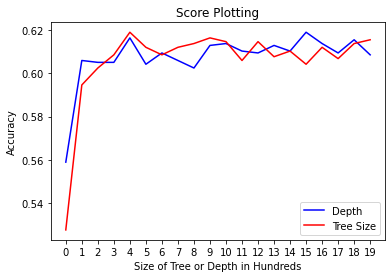

In [33]:
fig, ax = plt.subplots()

ax.title.set_text('Score Plotting')
plt.ylabel('Accuracy')
plt.xlabel('Size of Tree or Depth in Hundreds')

xi = list(range(len(result)))

y1 = result
y2 = result2

plt.plot(y1, "-b", label="Depth")
plt.plot(y2, "-r", label="Tree Size")

plt.legend(loc="lower right")

plt.xticks(xi)

plt.show()